In [1]:
import tensorflow as tf
import innvestigate
import rasterio
import numpy as np
from rasterio.plot import reshape_as_image,reshape_as_raster
import glob
import geopandas as gpd
from tensorflow.keras import models
import matplotlib.pyplot as plt
from skimage.measure import block_reduce
tf.compat.v1.disable_eager_execution()

In [2]:
# file_name = "Iowa_2021_july_8448-1792"

file_name = "Iowa_2021_july_1280-3072" ## Deviating true val vs predict
img_path = 'Input/sentinel/patches_256/Iowa_July_1_31/test/'+file_name+'.tif'
# img_path = 'Input/sentinel/patches_256/Iowa_July_1_31/test/'+file_name+'.tif'
file = rasterio.open(img_path)
img = reshape_as_image(file.read())
# file.close()
img_batch1 = np.expand_dims(img, axis=0)

img_batch = img_batch1[:,:,:,0:12]
model_id1 = "aanaxs4g" # With mask
model_id = "ezb3xkqf" # No Mask
model_path = glob.glob("wandb/"+ "*"+model_id+"*" + "/files/model-best.h5")[0]
model_path1 = glob.glob("wandb/"+ "*"+model_id1+"*" + "/files/model-best.h5")[0]

ev_gdf = gpd.read_file("Output/Evaluation/"+model_id+".shp")
ev_gdf1 = gpd.read_file("Output/Evaluation/"+model_id1+".shp")

# print(model_path)
cnn_model = models.load_model(model_path)
cnn_model_masked = models.load_model(model_path1)

2023-07-09 06:38:29.543983: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.


# LRP sequential preset a flat

/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2067: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


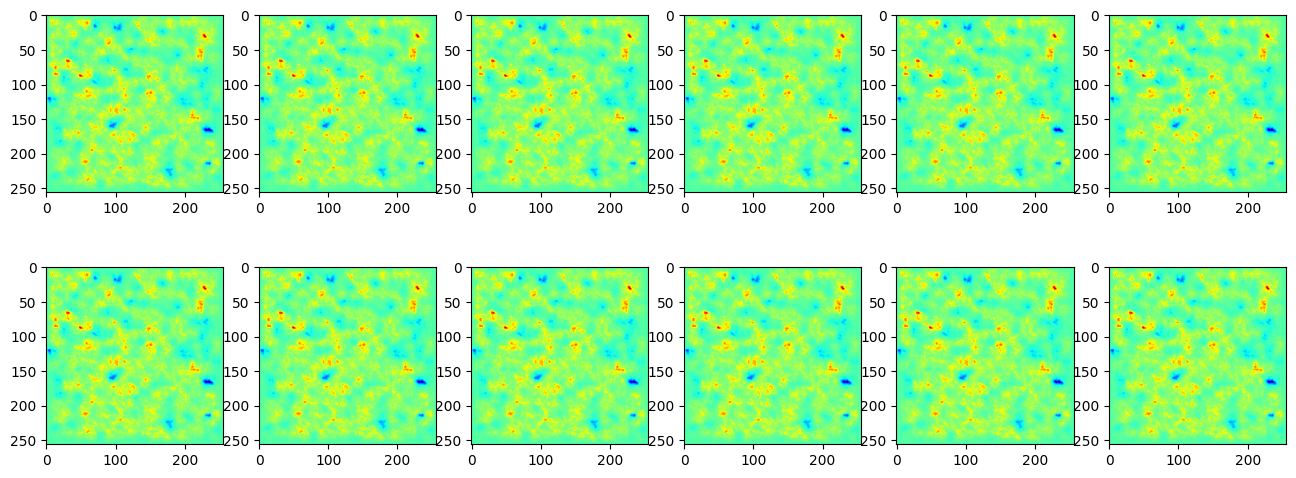

In [3]:
analyzer = innvestigate.create_analyzer("lrp.sequential_preset_a_flat", cnn_model)
a = analyzer.analyze(img_batch)
a1 = a[0] 
channels = 12
fig,ax = plt.subplots(2,6,figsize=(16,6))
ax[0,0].imshow(a[0][:,:,0],cmap="jet")
ax[0,1].imshow(a[0][:,:,1],cmap="jet")
ax[0,2].imshow(a[0][:,:,2],cmap="jet")
ax[0,3].imshow(a[0][:,:,3],cmap="jet")
ax[0,4].imshow(a[0][:,:,4],cmap="jet")
ax[0,5].imshow(a[0][:,:,5],cmap="jet")
ax[1,0].imshow(a[0][:,:,6],cmap="jet")
ax[1,1].imshow(a[0][:,:,7],cmap="jet")
ax[1,2].imshow(a[0][:,:,8],cmap="jet")
ax[1,3].imshow(a[0][:,:,9],cmap="jet")
ax[1,4].imshow(a[0][:,:,10],cmap="jet")
ax[1,5].imshow(a[0][:,:,11],cmap="jet")

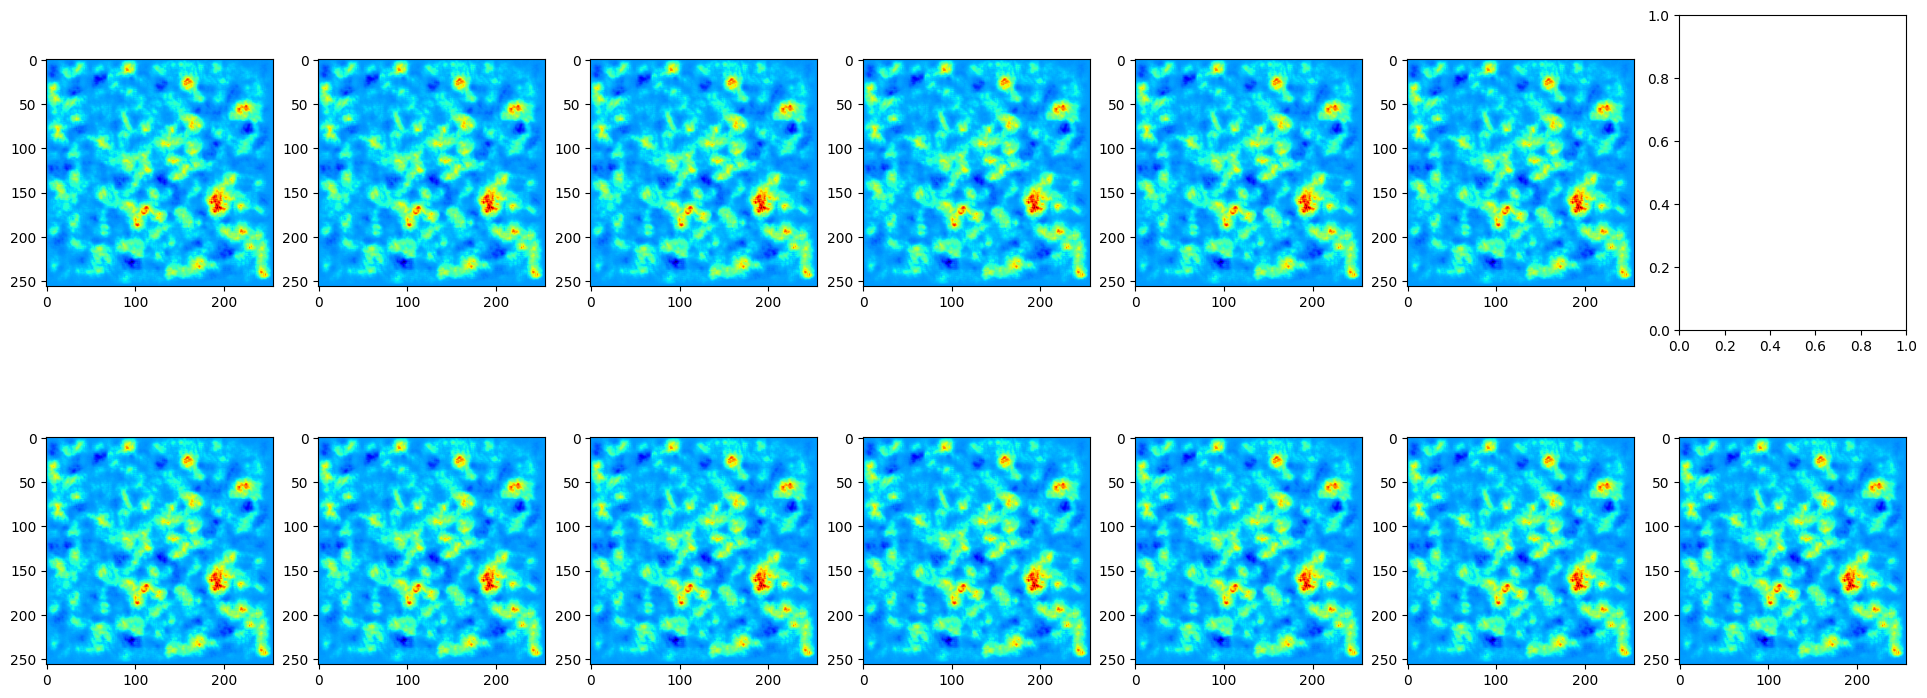

In [4]:
analyzer_masked = innvestigate.create_analyzer("lrp.sequential_preset_a_flat", cnn_model_masked)
a_masked = analyzer_masked.analyze(img_batch1)
a1_masked = a_masked[0] 
channels = 12
fig,ax = plt.subplots(2,7,figsize=(24,9))
ax[0,0].imshow(a_masked[0][:,:,0],cmap="jet")
ax[0,1].imshow(a_masked[0][:,:,1],cmap="jet")
ax[0,2].imshow(a_masked[0][:,:,2],cmap="jet")
ax[0,3].imshow(a_masked[0][:,:,3],cmap="jet")
ax[0,4].imshow(a_masked[0][:,:,4],cmap="jet")
ax[0,5].imshow(a_masked[0][:,:,5],cmap="jet")
ax[1,0].imshow(a_masked[0][:,:,6],cmap="jet")
ax[1,1].imshow(a_masked[0][:,:,7],cmap="jet")
ax[1,2].imshow(a_masked[0][:,:,8],cmap="jet")
ax[1,3].imshow(a_masked[0][:,:,9],cmap="jet")
ax[1,4].imshow(a_masked[0][:,:,10],cmap="jet")
ax[1,5].imshow(a_masked[0][:,:,11],cmap="jet")
ax[1,6].imshow(a_masked[0][:,:,12],cmap="jet")

In [9]:
# Aggregate along color channels and normalize to [-1, 1]

a1_masked = a1_masked.sum(axis=np.argmax(np.asarray(a1_masked.shape) == 13))
a1_masked /= np.max(np.abs(a1_masked))
print(a1_masked.shape)
a1 = a1.sum(axis=np.argmax(np.asarray(a1.shape) == 12))
a1 /= np.max(np.abs(a1))
print(a1.shape)

()
()


TypeError: Invalid shape () for image data

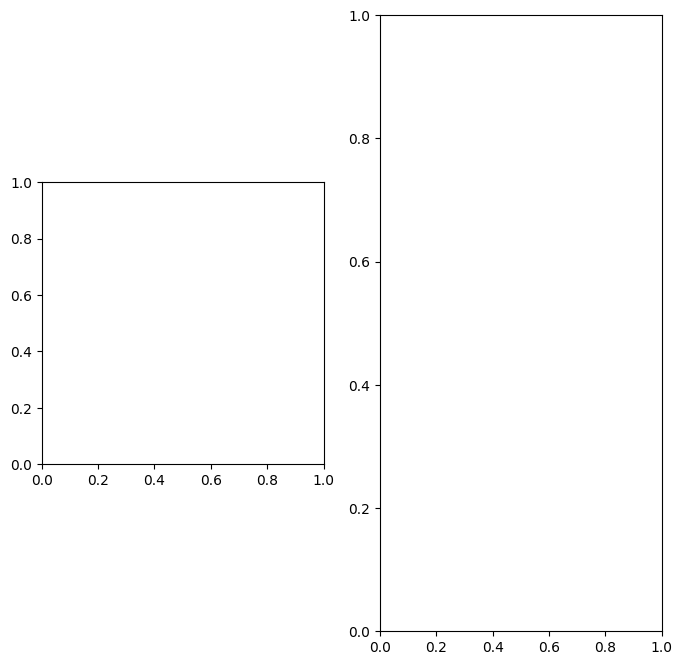

In [10]:
fig,ax = plt.subplots(1,2,figsize = (8,8))
ax[0].imshow(a1_masked, cmap="jet")
ax[0].set_title("With Mask Layer") 
ax[1].imshow(a1, cmap="jet")
ax[1].set_title("Without Mask Layer") 

# LRP sequential preset b flat 

In [18]:
analyzer = innvestigate.create_analyzer("lrp.sequential_preset_a_flat", cnn_model)
a = analyzer.analyze(img_batch)
a1_lrpb = a[0] 
analyzer_masked = innvestigate.create_analyzer("lrp.sequential_preset_a_flat", cnn_model_masked)
a_masked = analyzer_masked.analyze(img_batch1)
a1_masked_lrpb = a_masked[0] 

In [19]:
# Aggregate along color channels and normalize to [-1, 1]

a1_masked_lrpb = a1_masked_lrpb.sum(axis=np.argmax(np.asarray(a1_masked_lrpb.shape) == 13))
a1_masked_lrpb /= np.max(np.abs(a1_masked_lrpb))
print(a1_masked_lrpb.shape)
a1_lrpb = a1_lrpb.sum(axis=np.argmax(np.asarray(a1_lrpb.shape) == 12))
a1_lrpb /= np.max(np.abs(a1_lrpb))
print(a1_lrpb.shape)

(256, 256)
(256, 256)


AttributeError: 'numpy.ndarray' object has no attribute 'axis'

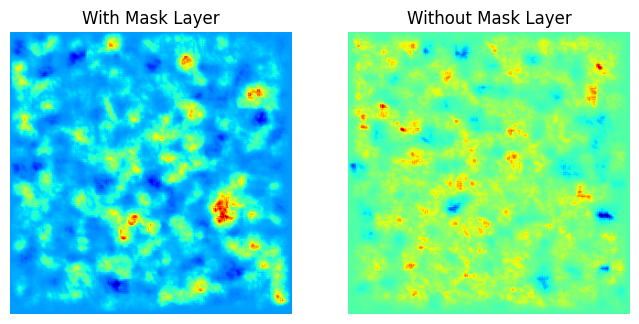

In [20]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
# ax = plt.subplot()

fig,ax = plt.subplots(1,2,figsize = (8,8))
ax[0].imshow(a1_masked_lrpb, cmap="jet")
ax[0].set_title("With Mask Layer") 
im = ax[1].imshow(a1_lrpb, cmap="jet")
ax[1].set_title("Without Mask Layer") 

ax[0].axis("off")
ax[1].axis("off")
# divider = make_axes_locatable(ax[1])
# cax = divider.append_axes("right", size="5%", pad=0.05)

# plt.colorbar(im, cax=cax)
ax.axis("off")

# Guided Back Propagation

In [40]:
analyzer = innvestigate.create_analyzer("gradient", cnn_model)
a = analyzer.analyze(img_batch)
a1_gbp = a[0] 
analyzer_masked = innvestigate.create_analyzer("gradient", cnn_model_masked)
a_masked = analyzer_masked.analyze(img_batch1)
a1_masked_gbp = a_masked[0] 

In [41]:
# Aggregate along color channels and normalize to [-1, 1]

a1_masked_gbp = a1_masked_gbp.sum(axis=np.argmax(np.asarray(a1_masked_gbp.shape) == 13))
a1_masked_gbp /= np.max(np.abs(a1_masked_gbp))
print(a1_masked_gbp.shape)
a1_gbp = a1_gbp.sum(axis=np.argmax(np.asarray(a1_gbp.shape) == 12))
a1_gbp /= np.max(np.abs(a1_gbp))
print(a1_gbp.shape)

(256, 256)
(256, 256)


Text(0.5, 1.0, 'Without Mask Layer')

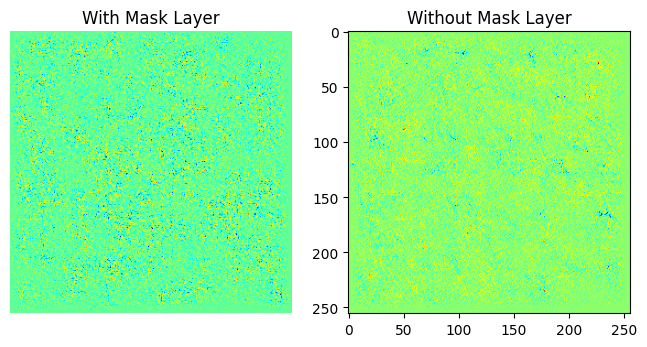

In [42]:
fig,ax = plt.subplots(1,2,figsize = (8,8))
ax[0].imshow(a1_masked_gbp, cmap="jet")
ax[0].set_title("With Mask Layer") 
ax[0].axis("off")
ax[1].imshow(a1_gbp, cmap="jet")
ax[1].set_title("Without Mask Layer") 

In [43]:
def get_saliency_maps(method_name,model,input_img,no_channels):
    analyzer = innvestigate.create_analyzer(method_name, model)
    a = analyzer.analyze(input_img)
    a1 = a[0] 
    a1 = a1.sum(axis=np.argmax(np.asarray(a1.shape) == no_channels))
    a1 /= np.max(np.abs(a1))
    return a1

In [260]:
img_batch1.shape

(1, 256, 256, 13)

In [15]:
lrp_a  = get_saliency_maps("lrp.sequential_preset_a_flat", cnn_model,img_batch,12)
lrp_a_masked  = get_saliency_maps("lrp.sequential_preset_a_flat", cnn_model_masked,img_batch1,13)
lrp_b  = get_saliency_maps("lrp.sequential_preset_b_flat", cnn_model,img_batch,12)
lrp_b_masked  = get_saliency_maps("lrp.sequential_preset_b_flat", cnn_model_masked,img_batch1,13)
gbp  = get_saliency_maps("guided_backprop", cnn_model,img_batch,12)
gbp_masked  = get_saliency_maps("guided_backprop", cnn_model_masked,img_batch1,13)
grad  = get_saliency_maps("gradient", cnn_model,img_batch,12)
grad_masked  = get_saliency_maps("gradient", cnn_model_masked,img_batch1,13)
smoothgrad  = get_saliency_maps("smoothgrad", cnn_model,img_batch,12)
smoothgrad_masked  = get_saliency_maps("smoothgrad", cnn_model_masked,img_batch1,13)
input_t_gradient  = get_saliency_maps("input_t_gradient", cnn_model,img_batch,12)
input_t_gradient_masked  = get_saliency_maps("input_t_gradient", cnn_model_masked,img_batch1,13)
deep_taylor  = get_saliency_maps("deep_taylor", cnn_model,img_batch,12)
deep_taylor_masked  = get_saliency_maps("deep_taylor", cnn_model_masked,img_batch1,13)
integrated_gradients  = get_saliency_maps("integrated_gradients", cnn_model,img_batch,12)
integrated_gradients_masked  = get_saliency_maps("integrated_gradients", cnn_model_masked,img_batch1,13)

In [16]:
saliency_dict = {"lrp_a":{"mask":lrp_a_masked,
                         "no_mask":lrp_a},
                "lrp_b":{"mask":lrp_b_masked,
                        "no_mask":lrp_b},
                 "gbp":{"mask":gbp_masked,
                        "no_mask":gbp},
                 "grad":{"mask":grad_masked,
                        "no_mask":grad},
                 "smoothgrad":{"mask":smoothgrad_masked,
                        "no_mask":smoothgrad},
                 "input_t_gradient":{"mask":input_t_gradient_masked,
                        "no_mask":input_t_gradient},
                 "deep_taylor":{"mask":deep_taylor_masked,
                        "no_mask":deep_taylor},
                  "integrated_gradients":{"mask":integrated_gradients_masked,
                        "no_mask":integrated_gradients},
                }

In [155]:
def plot_saliency(ax,row_no,method_name,add_dim = False):
    ax[row_no,0].set_ylabel(method_name, rotation=90, size='large')
    ax[row_no,0].imshow(saliency_dict[method_name]["mask"], cmap="jet")
    # ax[row_no,0].axis("off")
    # ax[row_no,0].set_title("With Mask Layer") 
    ax[row_no,1].imshow(saliency_dict[method_name]["no_mask"], cmap="jet")
    # ax[row_no,1].axis("off")
    if add_dim:
        block_size = (64,64,3)
    else:
        block_size = (64,64)

    arr_reduced_mask = block_reduce(saliency_dict[method_name]["mask"], block_size=block_size, func=np.mean, cval=np.mean(saliency_dict[method_name]["mask"]))
    saliency_dict[method_name]["rank_mask"] = arr_reduced_mask
    
    order_mask = arr_reduced_mask.flatten().argsort()
    ranks_mask = order_mask.argsort()
    saliency_dict[method_name]["rank_mask_index"] = ranks_mask
    ax[row_no,2].imshow(arr_reduced_mask, cmap="jet")
            
    arr_reduced_nomask = block_reduce(saliency_dict[method_name]["no_mask"], block_size=block_size, func=np.mean, cval=np.mean(saliency_dict[method_name]["no_mask"]))
    saliency_dict[method_name]["rank_nomask"] = arr_reduced_nomask
    
    order_nomask = arr_reduced_nomask.flatten().argsort()
    ranks_nomask = order_nomask.argsort()
    saliency_dict[method_name]["rank_nomask_index"] = ranks_nomask
    ax[row_no,3].imshow(arr_reduced_nomask, cmap="jet")

In [156]:
grad_cam_mask_file = "Output/saliency_maps/gradCAM_mask_sent/test/"+file_name+".tif"
grad_cam_nomask_file = "Output/saliency_maps/gradCAM_nomask_sent/test/"+file_name+".tif"

grad_cam_mask = reshape_as_image(rasterio.open(grad_cam_mask_file).read()[13:16,:,:])
grad_cam_nomask = reshape_as_image(rasterio.open(grad_cam_nomask_file).read()[12:15,:,:])

In [157]:
saliency_dict["gradCAM"] = {}
saliency_dict["gradCAM"]["mask"] = grad_cam_mask
saliency_dict["gradCAM"]["no_mask"] = grad_cam_nomask

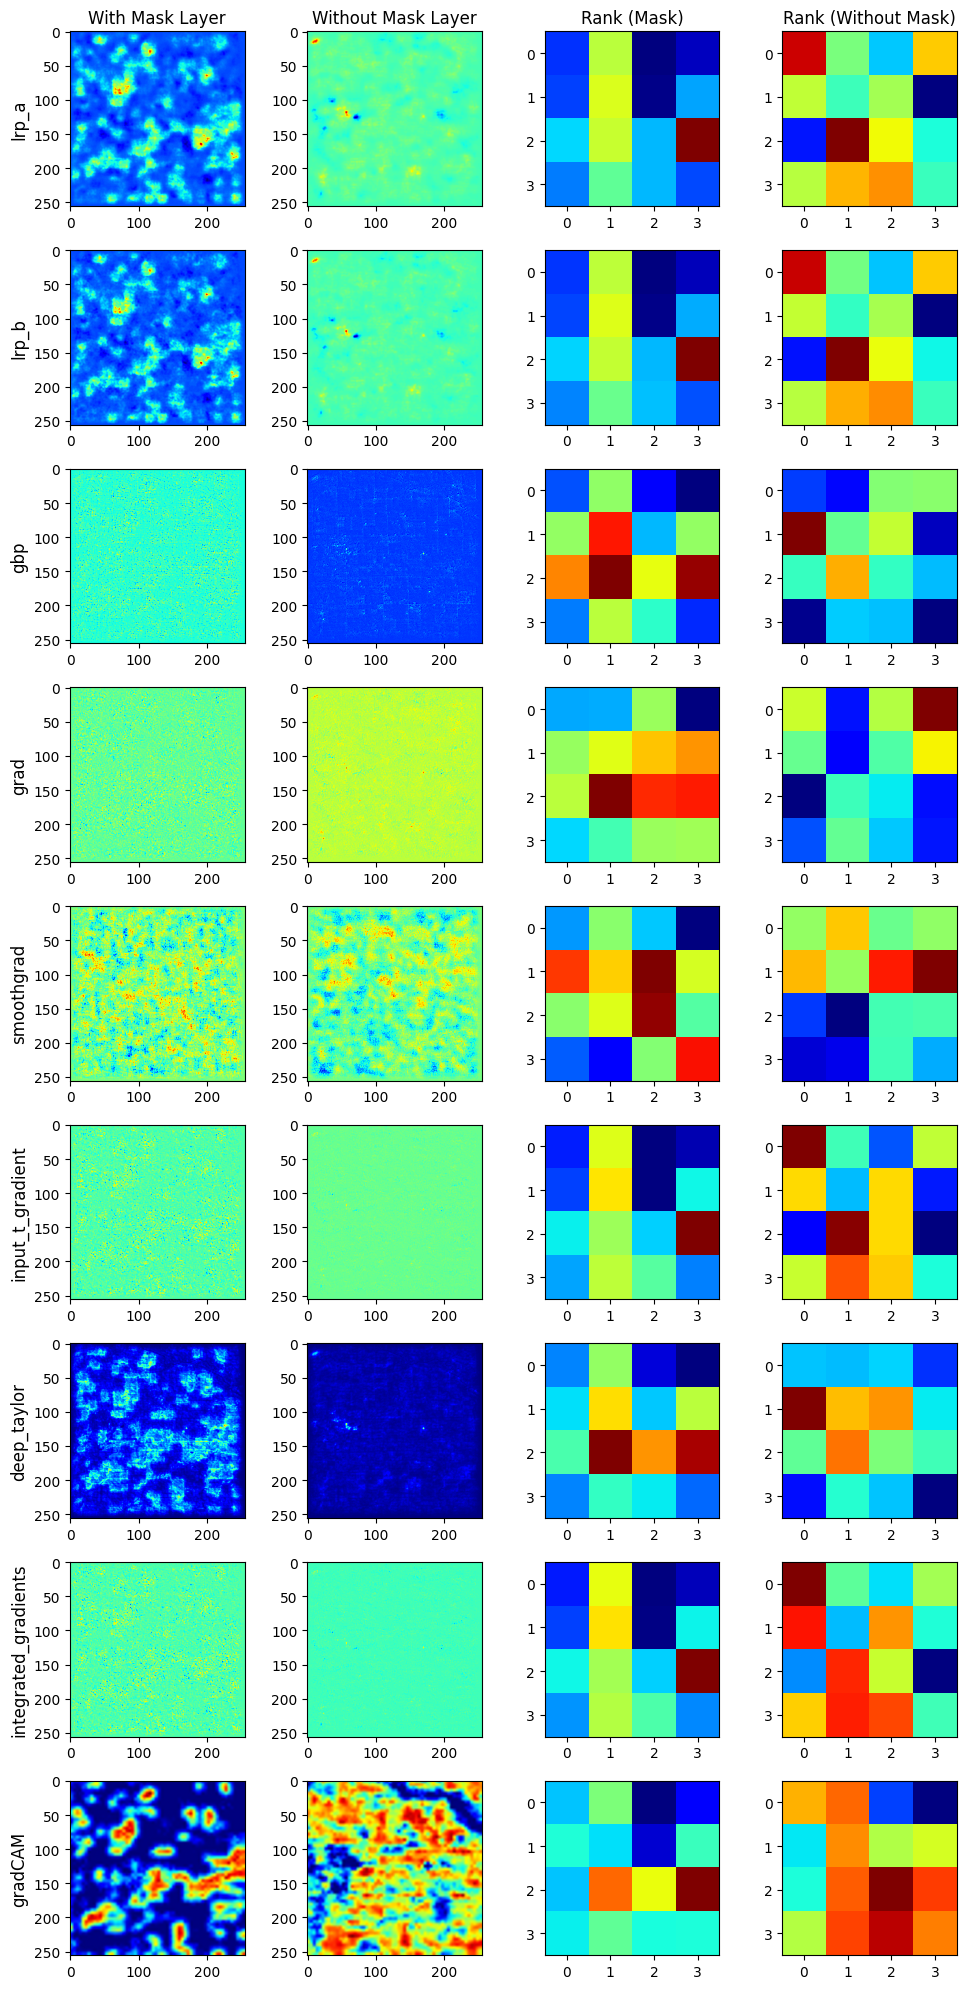

In [258]:
fig,ax = plt.subplots(9,4,figsize = (10,20))
ax[0,0].set_title("With Mask Layer")
ax[0,1].set_title("Without Mask Layer")
ax[0,2].set_title("Rank (Mask)")
ax[0,3].set_title("Rank (Without Mask)")

plot_saliency(ax,0,"lrp_a")
plot_saliency(ax,1,"lrp_b")
plot_saliency(ax,2,"gbp")
plot_saliency(ax,3,"grad")
plot_saliency(ax,4,"smoothgrad")
plot_saliency(ax,5,"input_t_gradient")
plot_saliency(ax,6,"deep_taylor")
plot_saliency(ax,7,"integrated_gradients")
plot_saliency(ax,8,"gradCAM",add_dim=True)


plt.savefig("Saliency_maps.png")
fig.tight_layout()

In [159]:
# Parameters
# ----------
# image : ndarray
#     Input image data. Will be converted to float.
# mode : str
#     One of the following strings, selecting the type of noise to add:

#     'gauss'     Gaussian-distributed additive noise.
#     'poisson'   Poisson-distributed noise generated from the data.
#     's&p'       Replaces random pixels with 0 or 1.
#     'speckle'   Multiplicative noise using out = image + n*image,where
#                 n is uniform noise with specified mean & variance.


import numpy as np
import os
import cv2
def noisy(noise_typ,image):
    if noise_typ == "gauss":
        row,col,ch= image.shape
        mean = 0
        var = 0.1
        sigma = var**0.5
        gauss = np.random.normal(mean,sigma,(row,col,ch))
        gauss = gauss.reshape(row,col,ch)
        noisy = image + gauss
        # noisy = gauss
        return noisy
    elif noise_typ == "s&p":
        row,col,ch = image.shape
        s_vs_p = 0.5
        amount = 0.004
        out = np.copy(image)
        # Salt mode
        num_salt = np.ceil(amount * image.size * s_vs_p)
        coords = [np.random.randint(0, i - 1, int(num_salt))
              for i in image.shape]
        out[coords] = 1

        # Pepper mode
        num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
        coords = [np.random.randint(0, i - 1, int(num_pepper))
              for i in image.shape]
        out[coords] = 0
        return out
    elif noise_typ == "poisson":
        vals = len(np.unique(image))
        vals = 2 ** np.ceil(np.log2(vals))
        noisy = np.random.poisson(image * vals) / float(vals)
        return noisy
    elif noise_typ =="speckle":
        row,col,ch = image.shape
        gauss = np.random.randn(row,col,ch)
        gauss = gauss.reshape(row,col,ch)        
        noisy = image + image * gauss
        return noisy

In [65]:
a = noisy("gauss",grad_cam_mask)

In [68]:
img.shape

(256, 256, 13)

In [239]:
print(img.min())
print(img.max())

0.0
1.1147


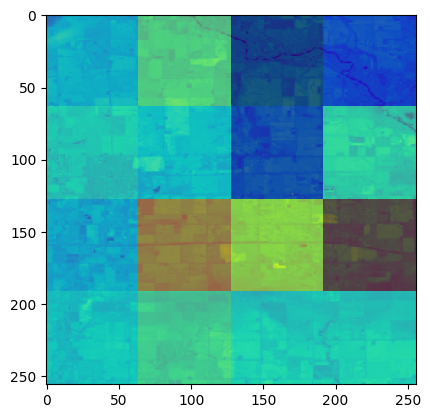

In [160]:
im = plt.imshow(img[:,:,7])
plt.imshow(saliency_dict["gradCAM"]["rank_mask"],alpha=0.5,extent=im.get_extent(),cmap="jet")


In [163]:
saliency_dict["gradCAM"]["rank_mask_index"]

array([ 4, 12,  0,  2,  9,  5,  1, 10,  3, 14, 13, 15,  6, 11,  7,  8])

In [104]:
img.shape

(256, 256, 13)

In [136]:
def blockshaped(arr, nrows, ncols):
    """
    Return an array of shape (n, nrows, ncols) where
    n * nrows * ncols = arr.size

    If arr is a 2D array, the returned array should look like n subblocks with
    each subblock preserving the "physical" layout of arr.
    """
    h, w = arr.shape
    assert h % nrows == 0, f"{h} rows is not evenly divisible by {nrows}"
    assert w % ncols == 0, f"{w} cols is not evenly divisible by {ncols}"
    return (arr.reshape(h//nrows, nrows, -1, ncols)
               .swapaxes(1,2)
               .reshape(-1, nrows, ncols))

def unblockshaped(arr, h, w):
    """
    Return an array of shape (h, w) where
    h * w = arr.size

    If arr is of shape (n, nrows, ncols), n sublocks of shape (nrows, ncols),
    then the returned array preserves the "physical" layout of the sublocks.
    """
    n, nrows, ncols = arr.shape
    return (arr.reshape(h//nrows, -1, nrows, ncols)
               .swapaxes(1,2)
               .reshape(h, w))

In [120]:
img_split = []
img_raster = reshape_as_raster(img)
for i in img_raster:
    split = blockshaped(i,64,64)
    img_split.append(split)
img_split = np.array(img_split)

In [182]:
img_split.shape

(13, 16, 64, 64)

In [189]:
img_split_swap = img_split.swapaxes(0,1)
print(img_split_swap.shape)

(16, 13, 64, 64)


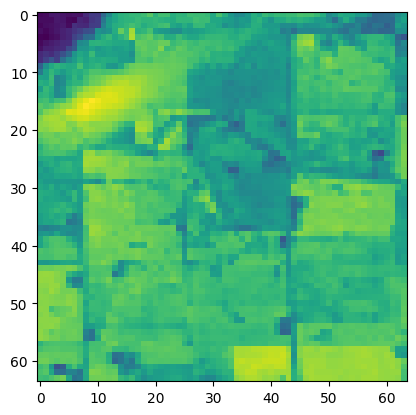

In [205]:
plt.imshow(img_split_swap[0][6,:,:])

In [192]:
gradCAM_rank = saliency_dict["gradCAM"]["rank_mask_index"]
gradCAM_rank

array([ 4, 12,  0,  2,  9,  5,  1, 10,  3, 14, 13, 15,  6, 11,  7,  8])

In [220]:
for i in gradCAM_rank:
    # print(img_split_swap[i].shape)
    img_split_swap_image = reshape_as_image(img_split_swap[i])
    img_split_swap_image = noisy("gauss",img_split_swap_image)
    img_split_swap[i] = reshape_as_raster(img_split_swap_image)
    # plt.imshow(img_split_swap_image[:,:,8])
    break

In [223]:
img_split = img_split_swap.swapaxes(0,1)
img_split.shape

(13, 16, 64, 64)

In [224]:
img_array = []
for i in img_split:
    img_reshaped = unblockshaped(i,256,256)
    img_array.append(img_reshaped)
img_array = np.array(img_array)
print(img_array.shape)

(13, 256, 256)


In [243]:
img.shape

(256, 256, 13)

In [248]:
img.max()

1.1147

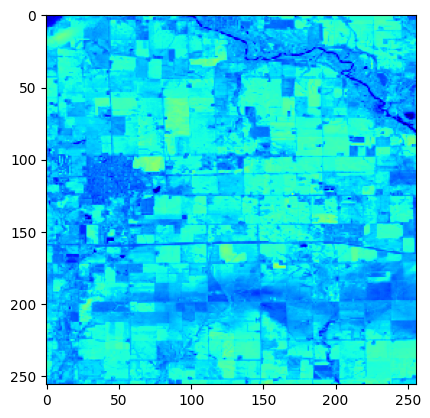

In [252]:
plt.imshow(img[:,:,7],cmap="jet",vmin=0,vmax=1.147)

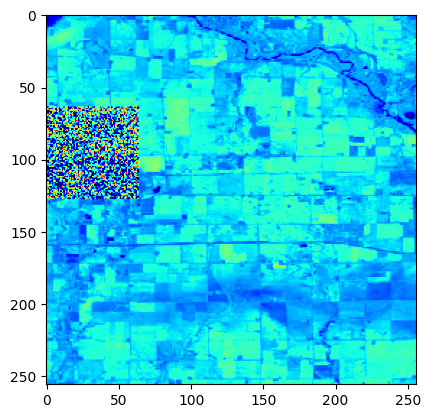

In [257]:
plt.imshow(img_array[7,:,:],cmap="jet",vmin=0,vmax=1.147)